In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv


In [4]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [5]:
# Check for missing values
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
# Convert 'Order Date' to datetime format with inference
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')  # Coerce errors to NaT

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


In [9]:
# Check the column names in the dataset
print(data.columns)


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')


In [11]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0        8.0           10      2017.0  
1    749      0.18  149.80      0        8.0           10      2017.0  
2   2360      0.21  165.20      0       12.0            5      2017.0  
3    896      0.25   89.60      0       11.0            9      2016.0  
4   2355      0.26  918.45      0       11.0            9      2016.0  


<ipython-input-12-a50c0a8b5cf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


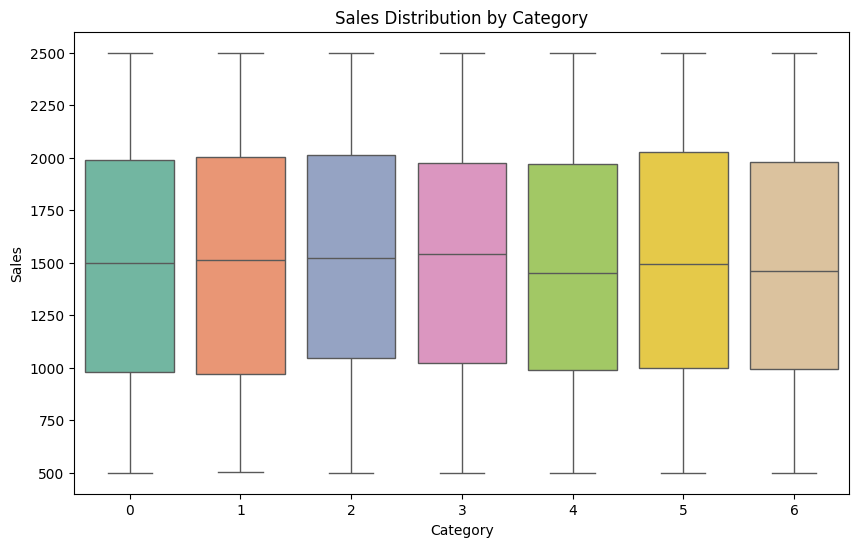

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

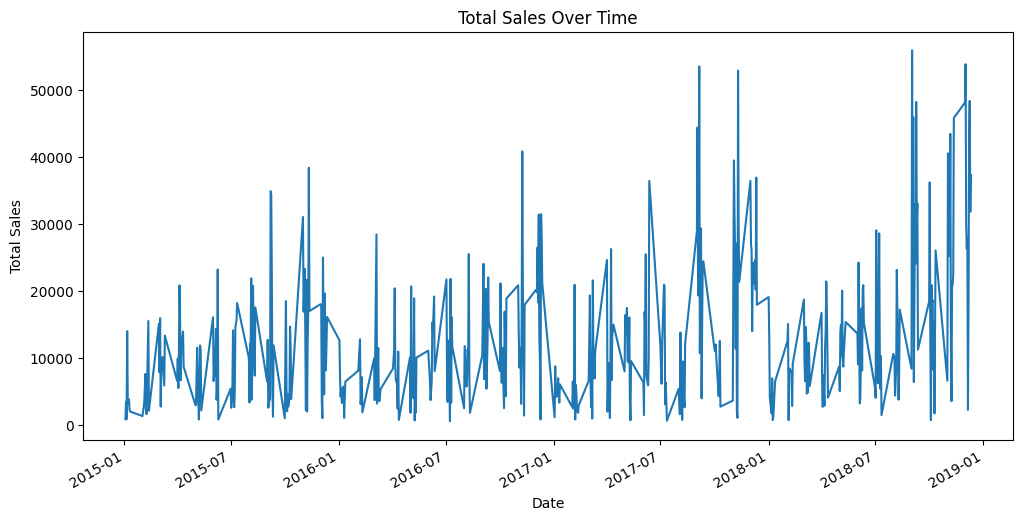

In [13]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

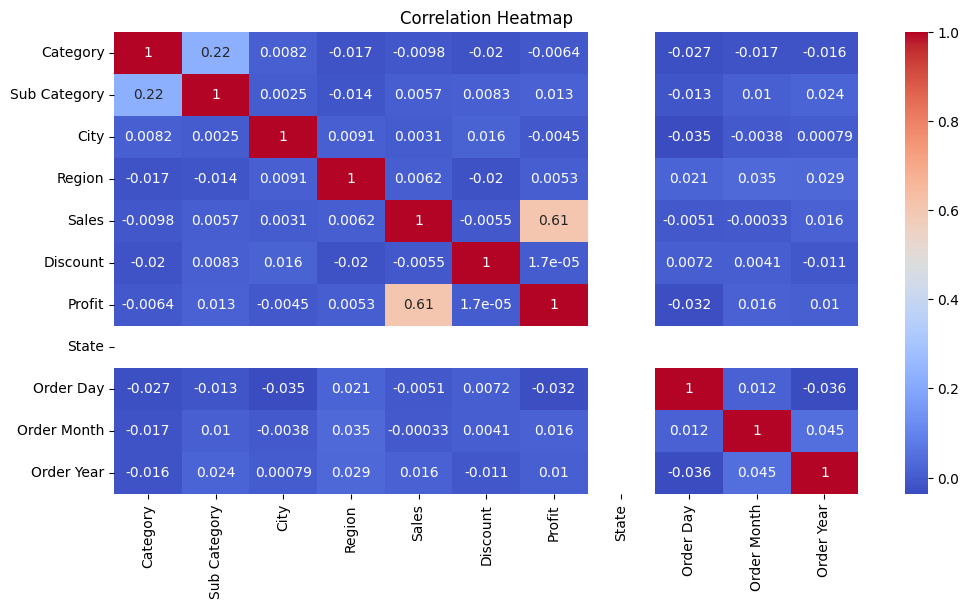

In [15]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# Select features and target variable
features=data.drop(columns=['Order ID','Customer Name','Order Date', 'Sales', 'Order Month'])
target = data['Sales']


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
import numpy as np

# Remove rows with NaN values from X_train and y_train
mask = np.isnan(X_train).any(axis=1)
X_train_cleaned = X_train[~mask]
y_train_cleaned = y_train[~mask]

# Fit the model again
model.fit(X_train_cleaned, y_train_cleaned)


LinearRegression()

In [29]:
import numpy as np
import pandas as pd

# Remove rows with NaN values in X_train and y_train
mask = np.isnan(X_train).any(axis=1)

# Clean X_train and y_train using the mask
X_train_cleaned = X_train[~mask]
y_train_cleaned = y_train[~mask]

# Fit the model with the cleaned data
model.fit(X_train_cleaned, y_train_cleaned)



LinearRegression()

In [31]:
# Remove rows with NaN values in X_test
mask_test = np.isnan(X_test).any(axis=1)
X_test_cleaned = X_test[~mask_test]

# Make predictions on the cleaned test data
y_pred = model.predict(X_test_cleaned)



In [33]:
# Clean X_test (remove rows with NaN values) and align y_test
mask_test = np.isnan(X_test).any(axis=1)
X_test_cleaned = X_test[~mask_test]
y_test_cleaned = y_test[~mask_test]  # Make sure y_test matches cleaned X_test

# Now make predictions
y_pred = model.predict(X_test_cleaned)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 207844.80442325815
R-squared: 0.37176230479364736


Size of y_test_cleaned: (824,)
Size of y_pred: (824,)


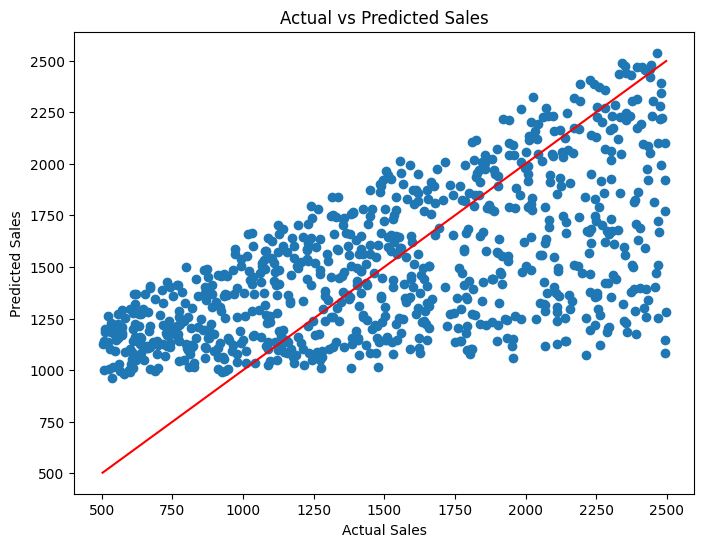

In [35]:
# If you cleaned X_test (e.g., by dropping NaN values), ensure y_test corresponds to the same cleaned subset
mask_test = np.isnan(X_test).any(axis=1)  # Create a mask for rows with NaN values in X_test
X_test_cleaned = X_test[~mask_test]
y_test_cleaned = y_test[~mask_test]  # Align y_test to the cleaned X_test

# Now make predictions with the cleaned X_test
y_pred = model.predict(X_test_cleaned)

# Check if sizes are the same
print(f"Size of y_test_cleaned: {y_test_cleaned.shape}")
print(f"Size of y_pred: {y_pred.shape}")

# Plot Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [38]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [39]:
#display the first five rows of the data
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [41]:
#Let's change the datatype of Order Date from object to date
df ['Order Date'] = pd.to_datetime (df ['Order Date'],
errors='ignore')

<ipython-input-41-d12f857a4751>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df ['Order Date'] = pd.to_datetime (df ['Order Date'],


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [43]:
# applying groupby() function to
# group the data on Category.
da=df.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


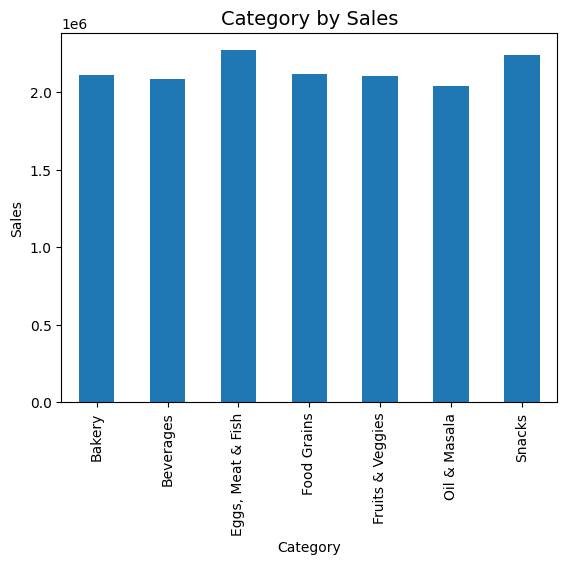

In [45]:
#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales
# for each category
Sales_category=df.groupby("Category")["Sales"].sum()
#we create a plot of sales by category
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [48]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Now extract the month and other details
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')  # Month name (e.g., 'January')
df['year'] = df['Order Date'].dt.year

# Display the updated DataFrame
print(df[['Order Date', 'month_no', 'Month', 'year']].head())


  Order Date  month_no     Month    year
0 2017-11-08      11.0  November  2017.0
1 2017-11-08      11.0  November  2017.0
2 2017-06-12       6.0      June  2017.0
3 2016-10-11      10.0   October  2016.0
4 2016-10-11      10.0   October  2016.0


In [49]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract the month number
df['month_no'] = df['Order Date'].dt.month

# Extract the full month name (e.g., 'January')
df['Month'] = df['Order Date'].dt.strftime('%B')

# Extract the year
df['year'] = df['Order Date'].dt.year

# Display the first few rows to check the added columns
print(df.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  month_no     Month  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu      11.0  November   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu      11.0  November   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu       6.0      June   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu      10.0   October   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu      10.0   October   

     year  
0  2017.0  
1  2017.0  
2  2017.0  
3  2016.

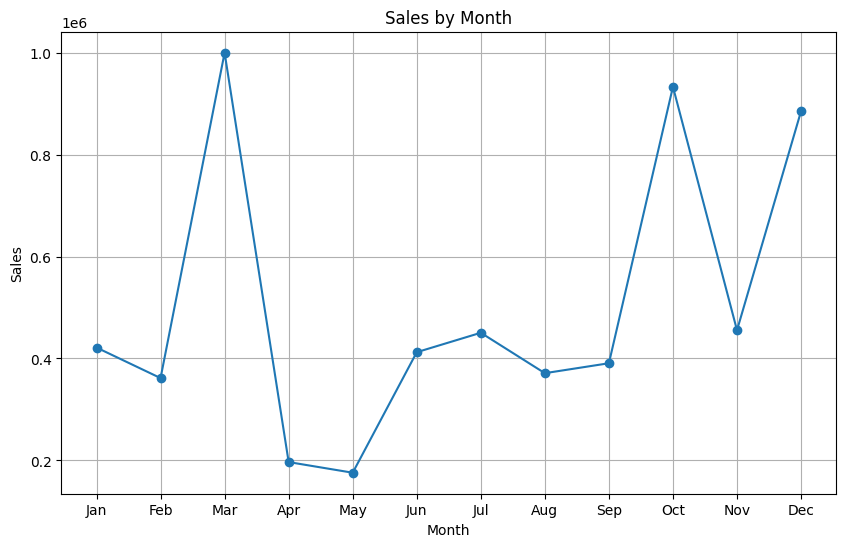

In [50]:
# Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

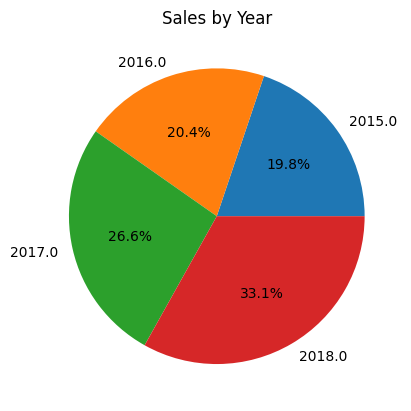

In [52]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each
# year
Yearly_Sales=df.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()

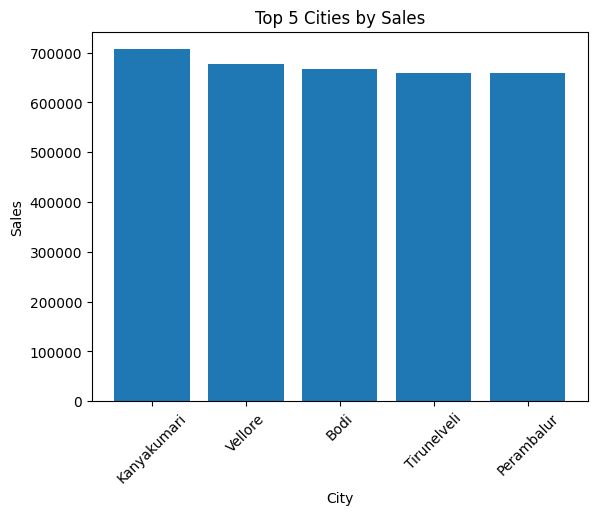

In [53]:
# Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()